In [13]:
from yolo_utils import get_random_yolo_samples
import sys
sys.path.append('../coco_utils')
font_path = '../coco_utils/ARIALBD.TTF'
from annotate_images import annotate_img, generate_distinct_colors
import yaml

In [14]:
dataset_dir = 'E:/datasets'
dataset_name = 'DOTA_dataset_512'
coco_dir = f'{dataset_dir}/{dataset_name}'
tar_dir = 'train'
img_size = 512
sample_size = 10

images, category_ids, annots = get_random_yolo_samples(f'{coco_dir}/{tar_dir}/labels', f'{coco_dir}/{tar_dir}/images', 
                                                      img_size, img_size, sample_size)

In [15]:
with open(f'{coco_dir}/yolo_config.yaml', 'r') as file:
    yaml_content = yaml.safe_load(file)

print(yaml_content)

cat_map = { ind:cat_name for ind, cat_name in enumerate(yaml_content['names'])}
print(cat_map)
distinct_colors = generate_distinct_colors(len(cat_map.keys()),alpha=255)
color_map ={}
for ind, color in zip(list(cat_map.keys()), distinct_colors):
    color_map[ind] = color

{'names': ['small-vehicle', 'large-vehicle', 'ship', 'harbor', 'baseball-diamond', 'soccer-ball-field', 'ground-track-field', 'swimming-pool', 'roundabout', 'tennis-court', 'basketball-court', 'plane', 'helicopter', 'bridge', 'storage-tank', 'container-crane'], 'nc': 16, 'path': 'E:/datasets/DOTA_dataset_512', 'train': 'train/images', 'val': 'val/images'}
{0: 'small-vehicle', 1: 'large-vehicle', 2: 'ship', 3: 'harbor', 4: 'baseball-diamond', 5: 'soccer-ball-field', 6: 'ground-track-field', 7: 'swimming-pool', 8: 'roundabout', 9: 'tennis-court', 10: 'basketball-court', 11: 'plane', 12: 'helicopter', 13: 'bridge', 14: 'storage-tank', 15: 'container-crane'}


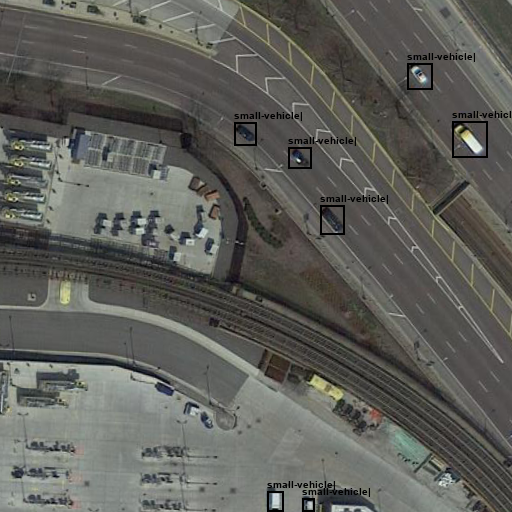

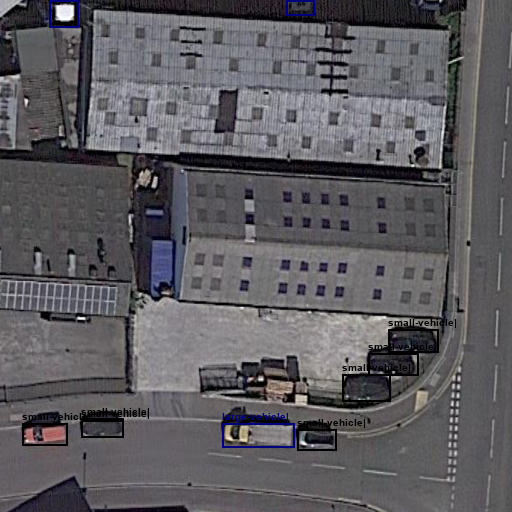

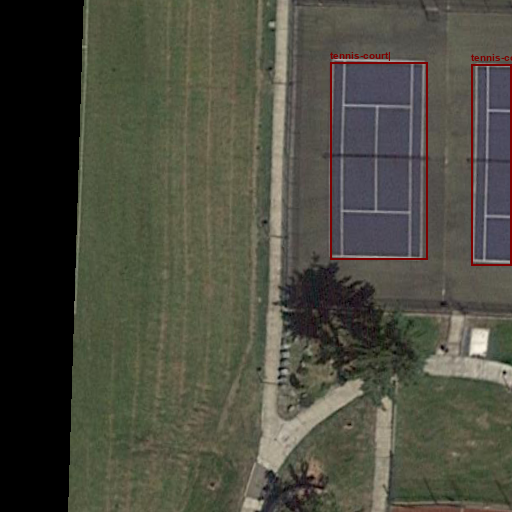

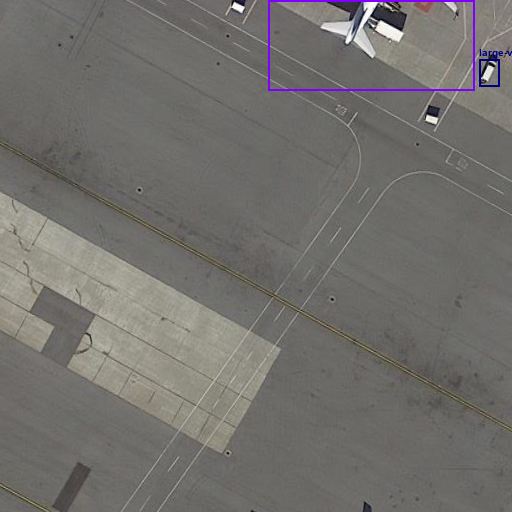

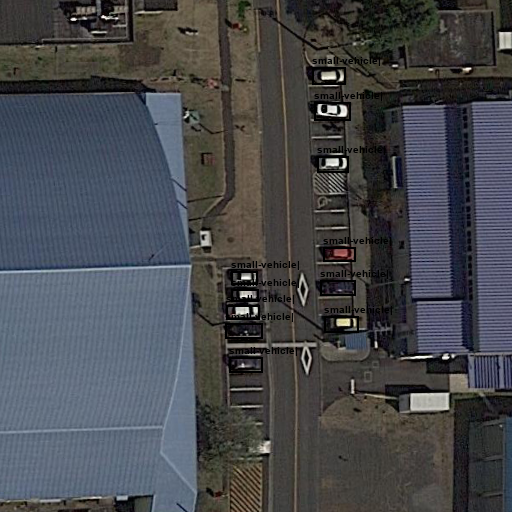

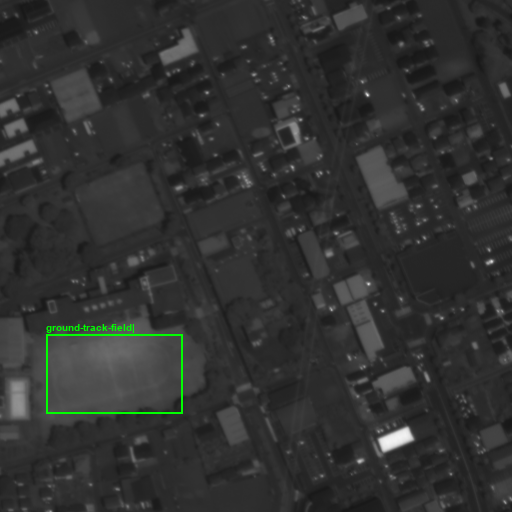

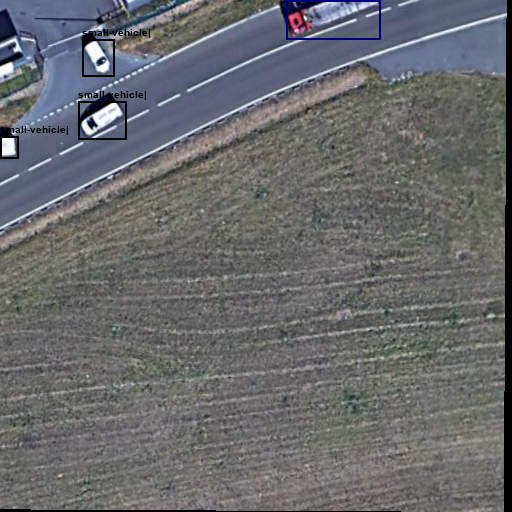

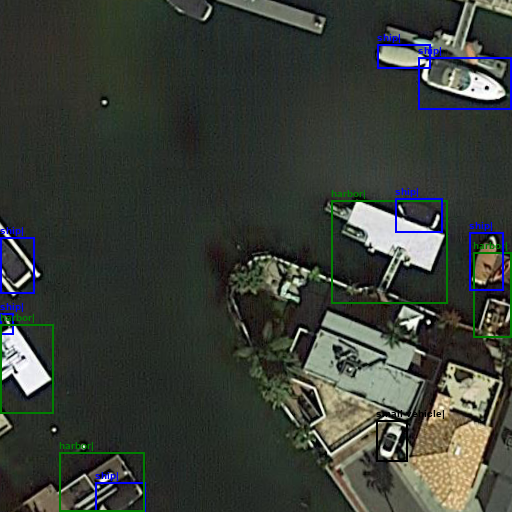

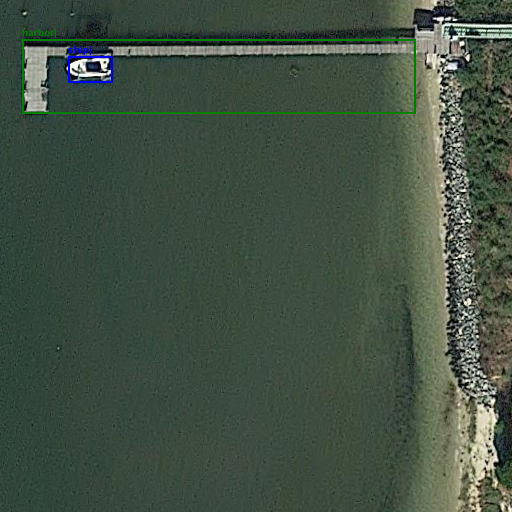

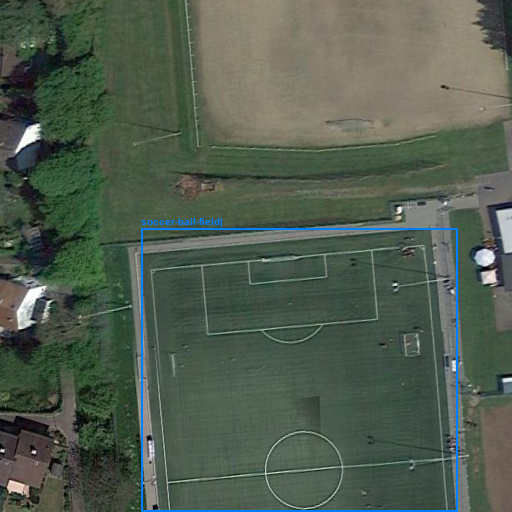

In [16]:
for image, categories, bboxes in zip(images, category_ids, annots):
    img = annotate_img(image, bboxes, categories, scores=None, category_id_to_name=cat_map, 
                 colors_map=color_map, font_size=10, font_path=font_path, thickness=2,
                 bbox_format='coco')
    display(img)


